In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

folder = ""
data_all = pd.read_csv("results/"+folder+"custom_CKL_1000.csv")
data = data_all.copy()
data.sort_values(by=['lag'], inplace=True)
data = data[data.n_pc.isin([1,2,3,5,10,20,50,100,200,1000])]

In [2]:
lags_all = data.lag.unique()
lags_all.sort()
n_pc_all = data.n_pc.unique()
n_pc_all.sort()

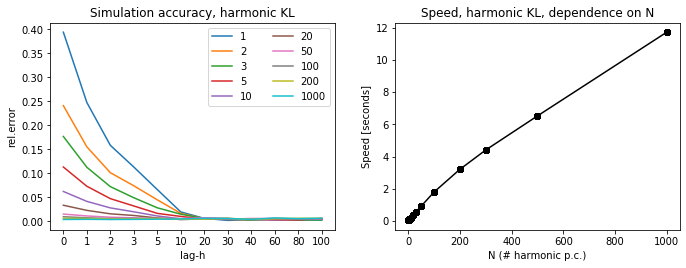

In [3]:
f, axarr = plt.subplots(1,2, figsize=(10,4))
f.tight_layout(pad=3.0)

data.sort_values(by=['lag'], inplace=True)
for n_pc in n_pc_all:
    axarr[0].plot( range(len(lags_all)), data.rel_error_nuc[ data.n_pc == n_pc ] )
axarr[0].legend(n_pc_all, ncol=2)
axarr[0].set_xlabel("lag-h")
axarr[0].set_xticks(range(len(lags_all)))
axarr[0].set_xticklabels(lags_all)
axarr[0].set_ylabel("rel.error")
axarr[0].set_title("Simulation accuracy, harmonic KL")

# simulation speed
data_all.sort_values(by=['n_pc'], inplace=True)
axarr[1].plot( data_all.n_pc, data_all.time, "k-o" )
axarr[1].set_xlabel("N (# harmonic p.c.)")
axarr[1].set_ylabel("Speed [seconds]")
axarr[1].set_title("Speed, harmonic KL, dependence on N")

f.savefig('custom_CKL_accuracy.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)